# Customer churn prediction project
- this part is made by Hajar Moustaine

# Importing libraries:

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.style.use("seaborn-v0_8-darkgrid")

# Importing data:

In [140]:
data = pd.read_csv("../data/customer_data.csv").set_index('customerID')
df = data.copy()

# Exploring data

In [141]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [143]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [144]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [145]:
df.shape

(7043, 20)


### Conclusion:
$\rightarrow$ no null values

In [146]:
df.duplicated().sum()

np.int64(22)

### Conclusion:
$\rightarrow$ no duplicated rows 

In [147]:
Numeric_cols = df.select_dtypes(include=['int64','float64']).columns

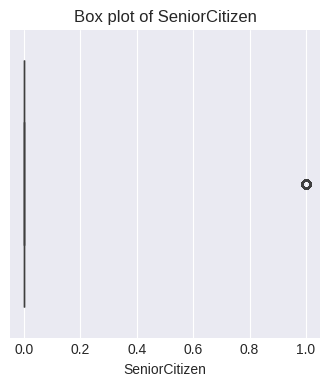

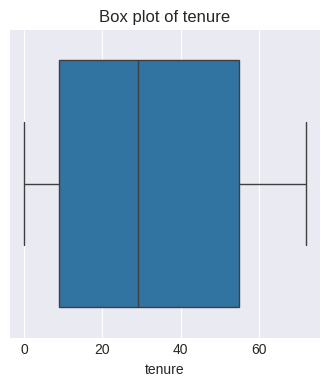

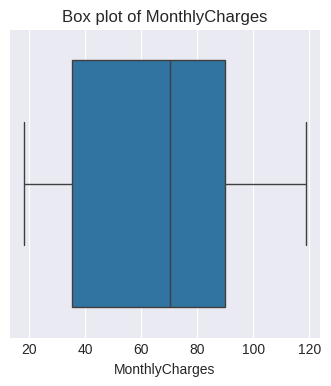

In [148]:
for col in Numeric_cols:
    plt.figure(figsize=(4,4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

- The seniorCitizen boxplot is not normal, why?

In [149]:
df["SeniorCitizen"]

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    0
7795-CFOCW    0
9237-HQITU    0
             ..
6840-RESVB    0
2234-XADUH    0
4801-JZAZL    0
8361-LTMKD    1
3186-AJIEK    0
Name: SeniorCitizen, Length: 7043, dtype: int64

- Let's change the ones to "yes" and the zeros to "no"

In [150]:
df['SeniorCitizen']=df['SeniorCitizen'].map({1:'Yes',0:'No'})

In [151]:
df["SeniorCitizen"]

customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK     No
7795-CFOCW     No
9237-HQITU     No
             ... 
6840-RESVB     No
2234-XADUH     No
4801-JZAZL     No
8361-LTMKD    Yes
3186-AJIEK     No
Name: SeniorCitizen, Length: 7043, dtype: object

In [152]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [153]:
def get_uniques(column):
    return df[column].unique()

def uniques_dictionary(column):
    unique_values = get_uniques(column)
    uniques_dictionary = {}
    
    for value in unique_values:
        value_count = df[df[column] == value].shape[0]
        uniques_dictionary[value] = value_count
    
    return uniques_dictionary

dict = uniques_dictionary("MultipleLines")

TypeError: 'value' must be an instance of str or bytes, not a float

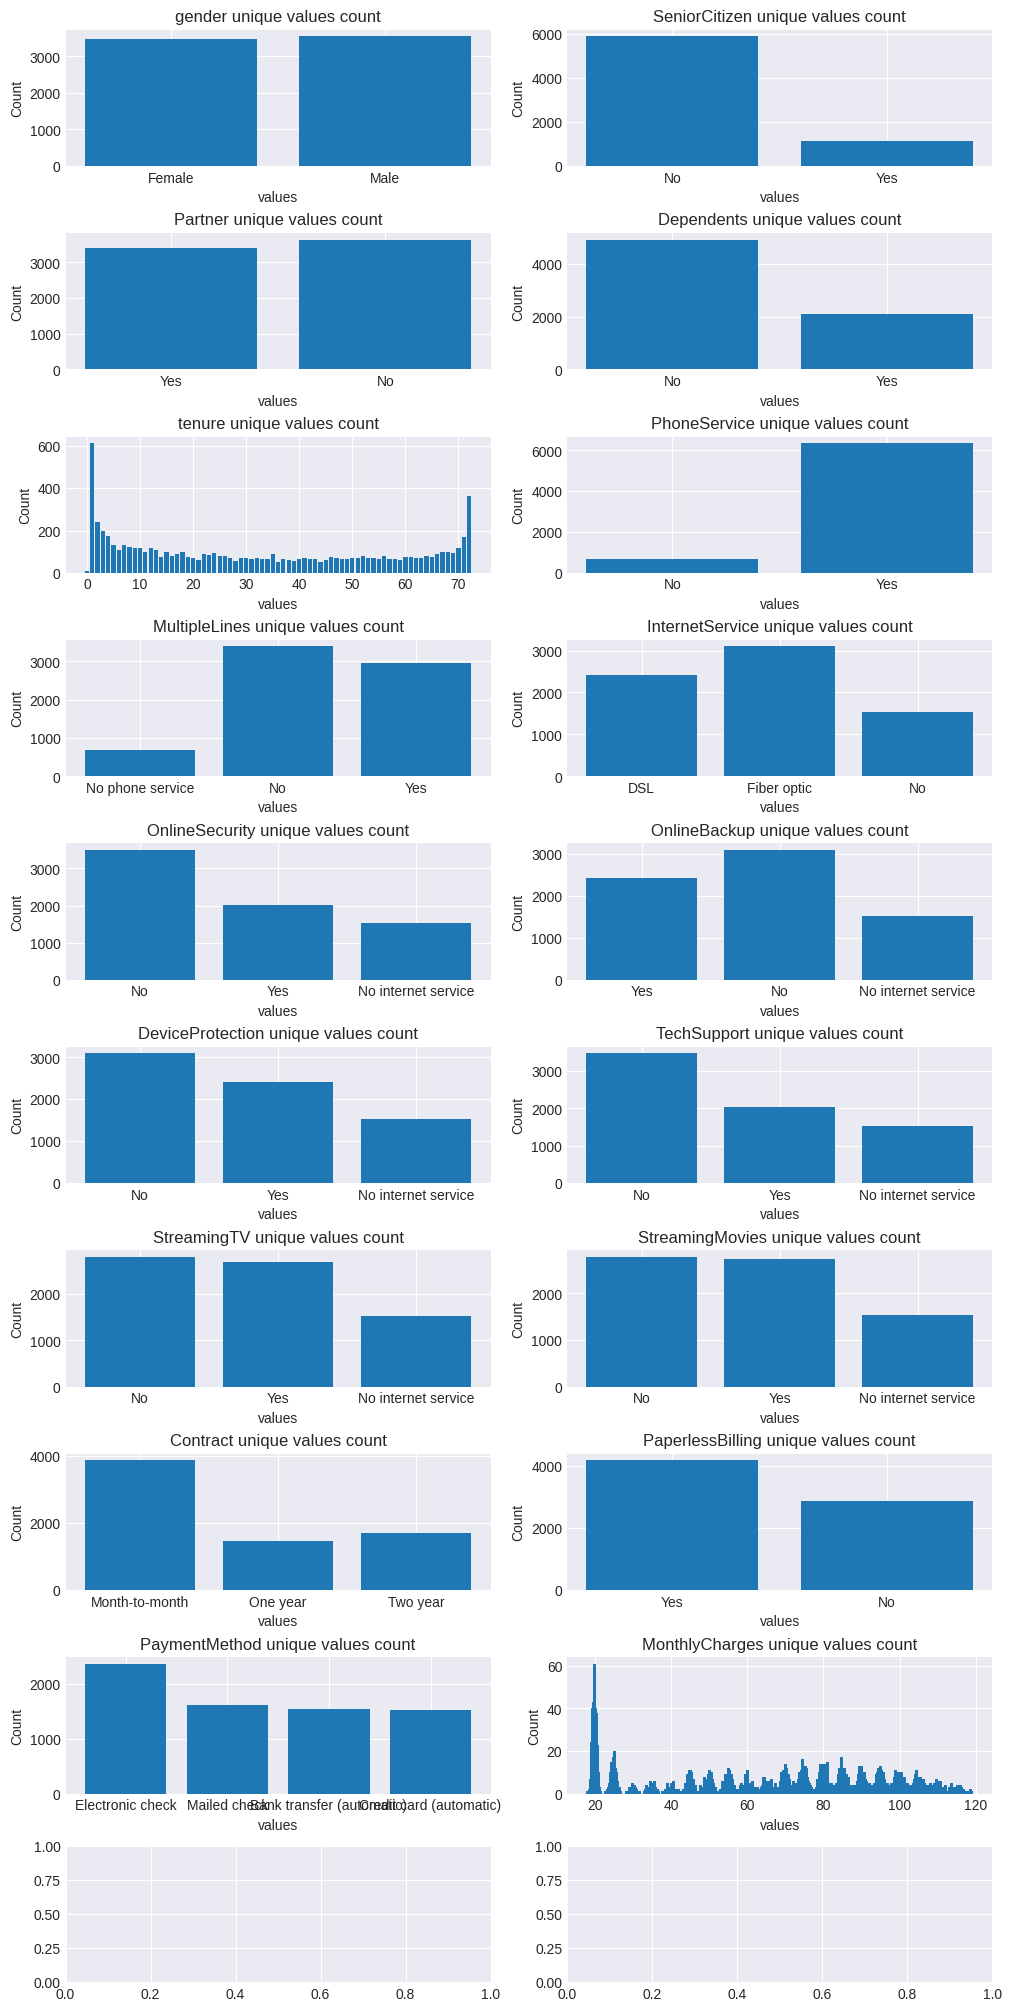

In [154]:
def plot_unique_values():
    columns = df.columns
    n_rows = (len(columns)+1)//2
    figure, axes = plt.subplots(n_rows ,2, figsize = (10,2*n_rows), constrained_layout=True)
    axes = axes.flatten()
    
    for i,column in enumerate(columns):
        value_counts = uniques_dictionary(column)
        
        axes[i].bar(value_counts.keys(), value_counts.values())
        axes[i].set_title(f"{column} unique values count")
        axes[i].set_ylabel("Count")
        axes[i].set_xlabel("values")
        
    plt.show()

plot_unique_values()

# Now let's try to find if there are any correlation between other columns and churing

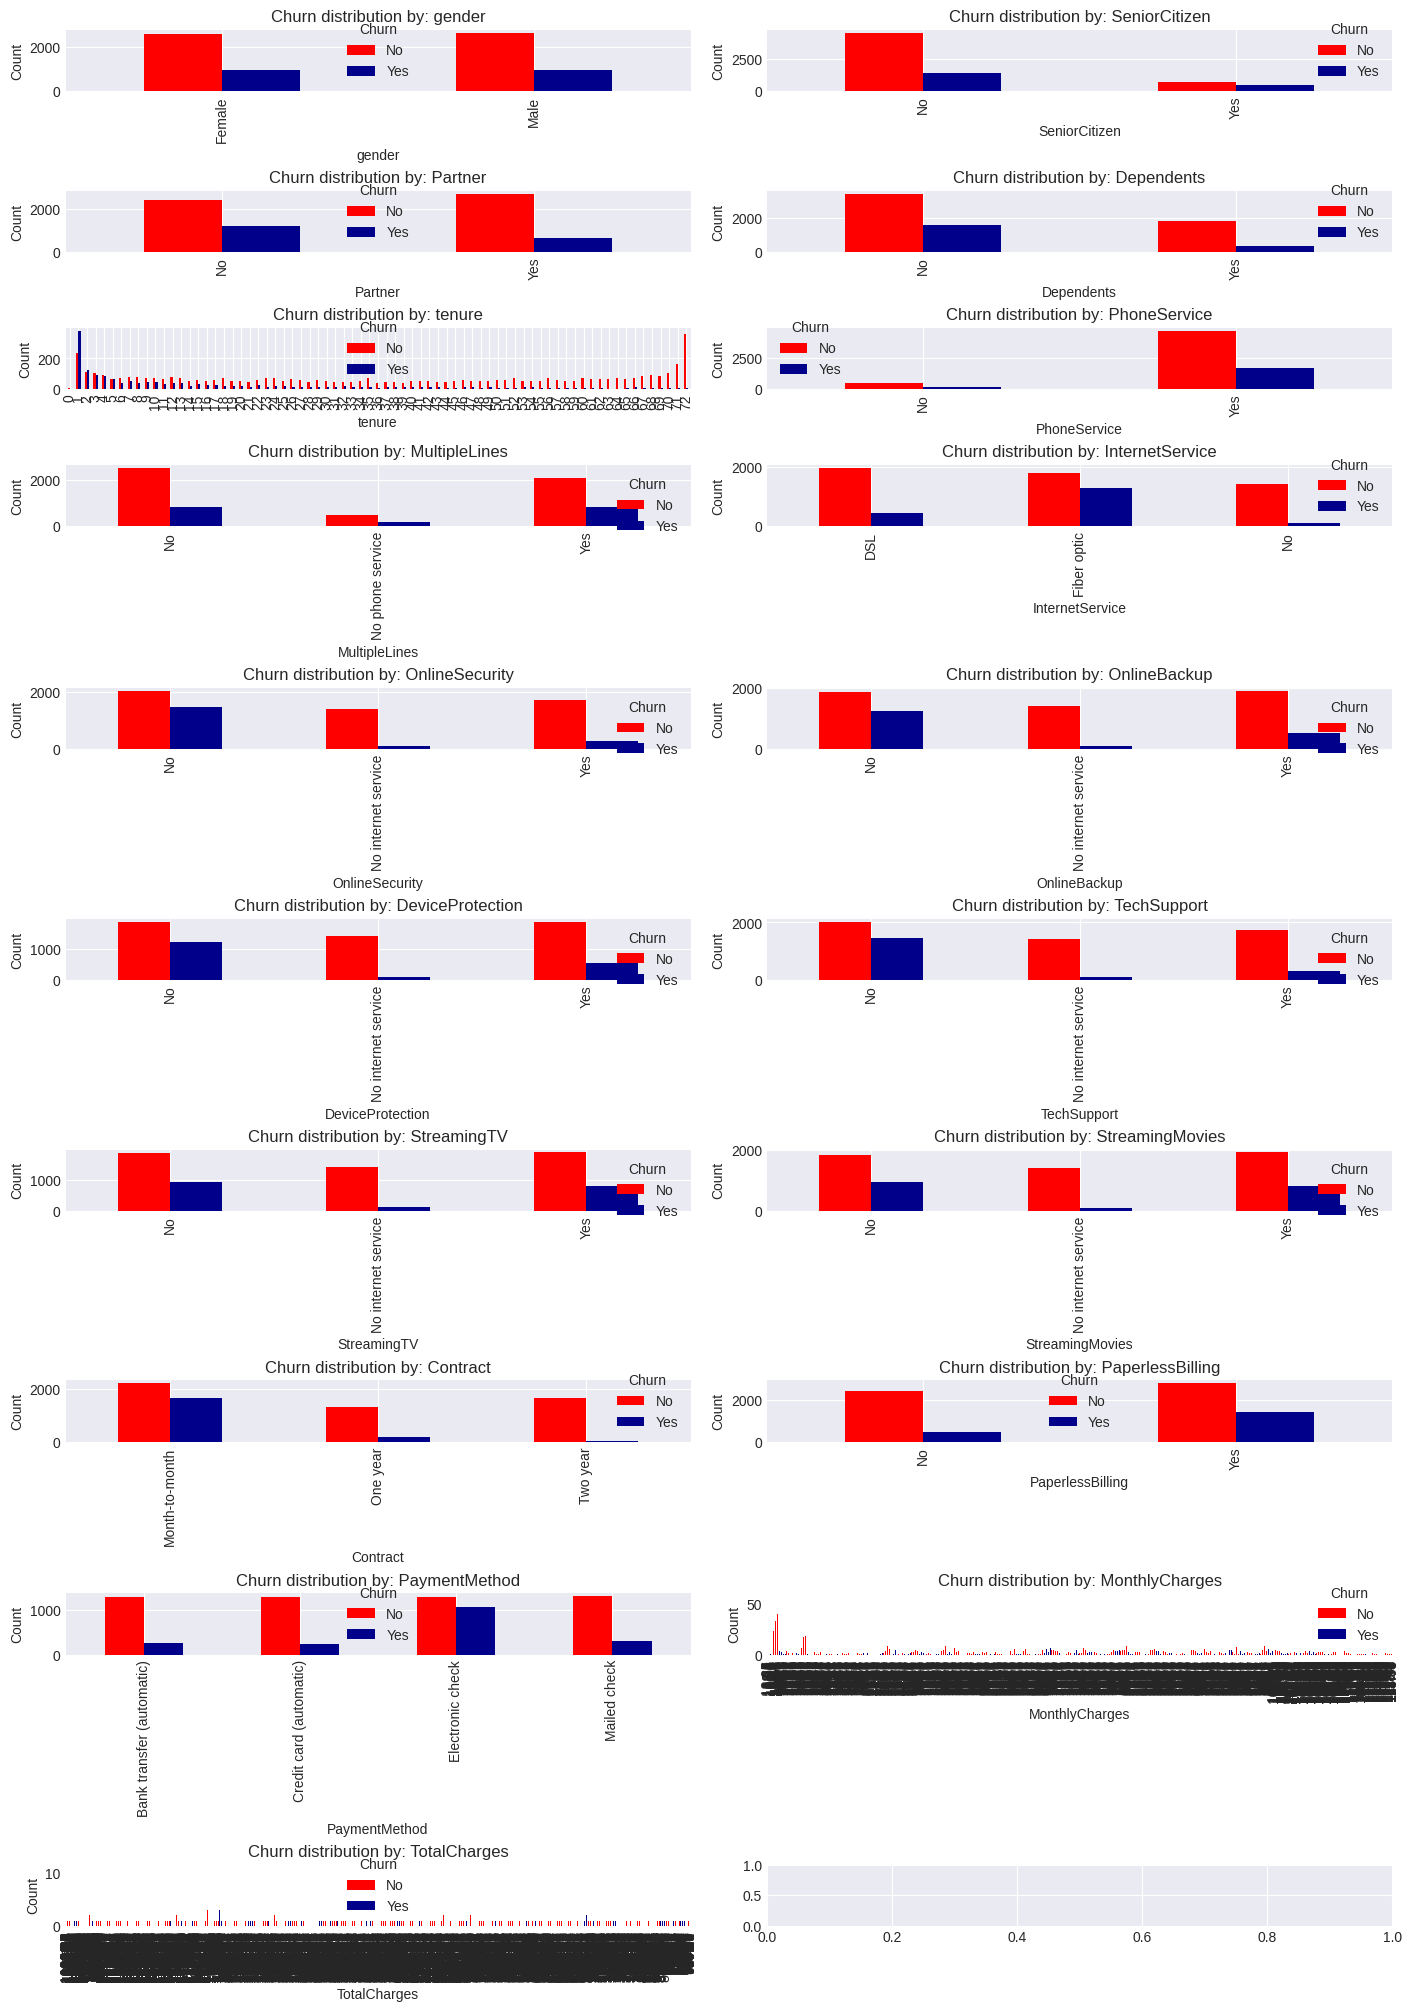

In [ ]:
def churn_by_column():
    columns = df.drop(columns=["Churn"]).columns
    n_rows = (len(columns)+1)//2
    figure, axes = plt.subplots(n_rows ,2, figsize = (14,2*n_rows), constrained_layout=True)
    axes = axes.flatten()
    
    for i,column in enumerate(columns):
        counts = (
                df.groupby([column,"Churn"])["Churn"]
                  .size()
                  .unstack(fill_value=0)
                )
        counts.plot(
                    kind='bar',
                    color = ["red", "darkblue"],
                    ax = axes[i]
                    )
        
        axes[i].set_title(f"Churn distribution by: {column}")
        axes[i].set_ylabel("Count")
        axes[i].set_xlabel(column)
    
    plt.show()
    
churn_by_column()

### Observations:
1. Both genders have the same churning rate
2. Not senior citizens tend to keep their 
3. People who have dependents (for example, children, a spouse, elderly parents, or others who rely on the customer for financial support) churn less that the ones who don't.
4. People who have phone services churn way more
5. Month-to-month contracts have a dramatically higher churn rate than other contract types
6. Customers with Fiber optic service show a significantly higher churn rate compared to those with DSL
7. Customers paying by Electronic check are more sustainable
8. The higher the monthly charges the higher the churn rate
9. it is observed that Customers who came with partners are very less likely to churn

## Conclusion:
The most related features with a high churn rate are:<br>
* Contract
* Tenure
* Internet
* Payment methodes
* Demographics
* Add-ons<br>
We are going to explore them more...

# Let's look at the tenure 

In [ ]:
df["tenure"].nunique()

73

<Axes: xlabel='tenure'>

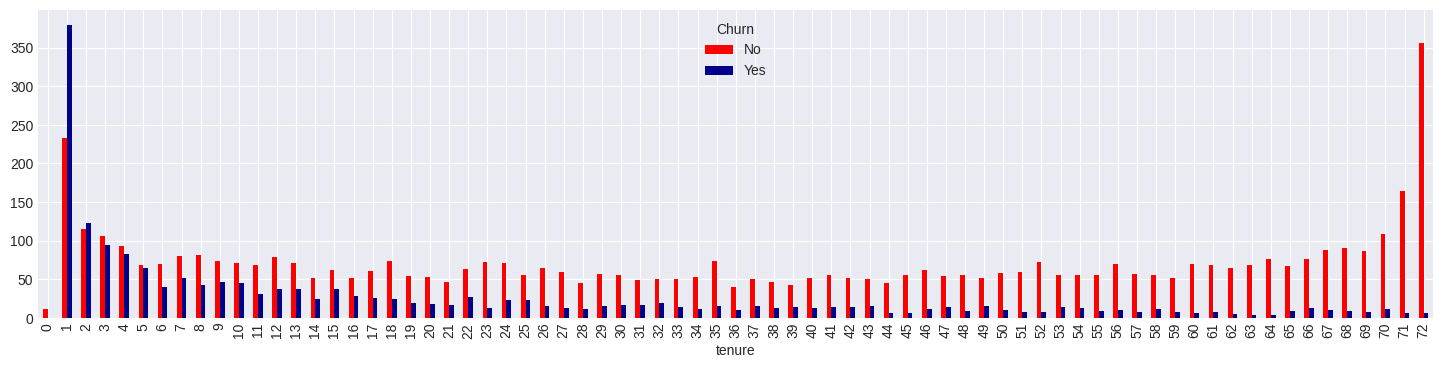

In [ ]:
counts = (df.groupby(['tenure',"Churn"])["Churn"].size() .unstack(fill_value=0))
counts.plot(kind='bar',color = ["red", "darkblue"], figsize=(18, 4))


$\rightarrow$ The higher the months the customer has stayed with the company, the smaller the churn rate is.<br>
only fair ig<br>
$\rightarrow$ Inversed relationship between churning and tenure, but very important

# Payment methodes and churn

In [ ]:
def calculate_proportion():
    rows_number = df.shape[0]
    unique_payment_methods = df['PaymentMethod'].unique()
    
    count_dict = {}
    for payment_method in unique_payment_methods:
        method_count = df[df['PaymentMethod'] == payment_method].shape[0]
        count_dict[payment_method] = method_count
    
    return count_dict

proportions_dictionary = calculate_proportion()
    

Text(0.5, 1.0, 'Proportions of Different Payment Methodes')

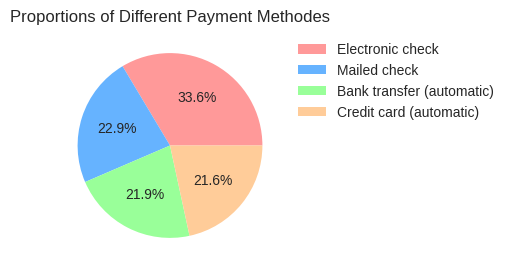

In [ ]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(7,3))
plt.pie(
        proportions_dictionary.values(),
        autopct='%1.1f%%',
        pctdistance=0.6,
        colors= colors
        )
plt.legend(
        labels= proportions_dictionary.keys(),
        bbox_to_anchor=(1, 0, 0.5, 1)
        )
plt.title("Proportions of Different Payment Methodes")

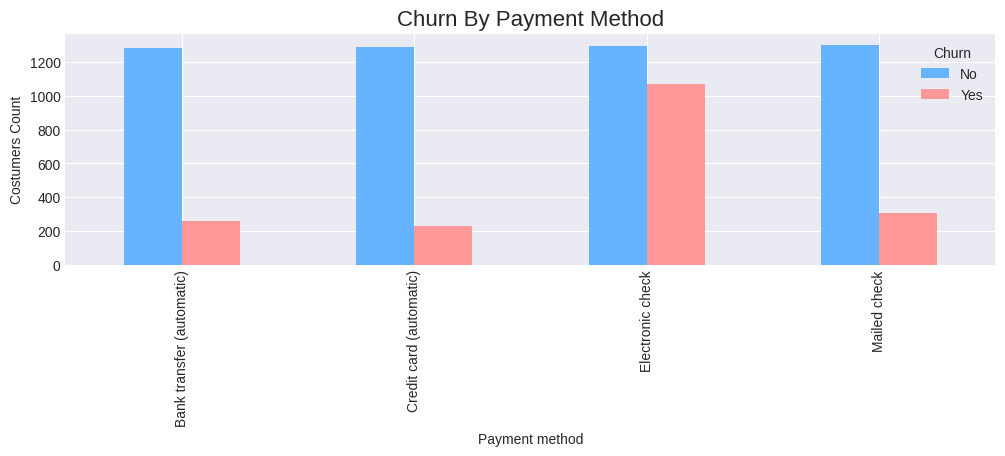

In [ ]:
def churn_by_payment():
    churn_by_payment = pd.crosstab(df['PaymentMethod'], df['Churn'])
    churn_by_payment.plot(
                        kind='bar',
                        figsize=(12, 3),
                        color=['#66b3ff', '#ff9999'] 
                        )
    
    plt.title("Churn By Payment Method", fontsize=16)
    plt.xlabel("Payment method")
    plt.ylabel("Costumers Count")
    plt.legend(title='Churn')
    plt.show()
    
churn_by_payment()

- Major customers who **churn** were having *Electronic Check *as Payment Method. Customers who opted for *Credit-Card automatic transfer* or *Bank Automatic Transfer* and *Mailed Check* as Payment Method were less likely to **move out**.

##   monthly payment VS Internet Service, Dependents and Contract  

In [ ]:
df["MonthlyCharges"].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ], shape=(1585,))

- We definitely need bins in this visualization

In [ ]:
df["MonthlyCharges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

- For a visual explanation:

Text(0.5, 0, 'money amount')

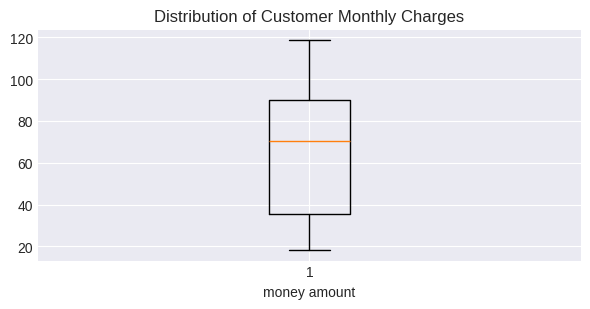

In [ ]:
plt.figure(figsize= (7,3))
plt.boxplot(x= df["MonthlyCharges"])
plt.title("Distribution of Customer Monthly Charges")
plt.xlabel("money amount")

#### Conclusions:
1. the minimum monthly charge is 20$, the maximum is approximately 120$
2. 75% of the clients pay less than 90$ (pricey? yes i guess)
3. 50% of the clients payment amount is between 35 and 90 dollars<br>
...

In [157]:
column = "MonthlyCharges"
data = df[column]
min_data = data.describe().loc['min']
min_data
data.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [168]:
def create_bins(column, bin_number = 4):
    data = df[column]
    min_data = data.describe().loc['min']
    max_data = data.describe().loc['max']
    step = (max_data - min_data)//bin_number
    bins = [(min_data+step)*i for i in range(bin_number)]
    
    return bins

In [169]:
column = "MonthlyCharges"
create_bins(column, bin_number = 4)

[np.float64(0.0), np.float64(43.25), np.float64(86.5), np.float64(129.75)]

In [170]:
def create_labels(bins):
    labels=[]
    for i in range(1,len(bins)):
        if i == 0:
            labels.append(f"Less than {bins[i]}")
        elif i == len(bins):
            labels.append(f"More than {bins[i]}")
        else:
            labels.append(f"Between {bins[i-1]} and {bins[i]}")

    return labels

In [171]:
columns = ["Dependents", "InternetService", "Contract"]

In [176]:
def view_feature_by_columns(feature, columns= columns):
    n_rows = (len(columns)+1)//2
    figure, axes = plt.subplots(n_rows ,2, figsize = (14,2.5*n_rows), constrained_layout=False)
    axes = axes.flatten()
    
    bins = create_bins(feature)
    labels = create_labels(bins)
    
    df["Binned_feature"] = pd.cut(
                          df[feature],
                          bins=bins,
                          labels=labels,
                          right=False
                          )
    for i,column in enumerate(columns):
        counts = (
                df.groupby([column,"Binned_feature"])["Binned_feature"]
                  .size()
                  .unstack(fill_value=0)
                )
        counts.plot(
                    kind='bar',
                    color =['#ff9999','#66b3ff','#99ff99'],
                    ax = axes[i],
                    legend=False 
                    )
        
        axes[i].set_title(f"{feature} distribution by: {column}")
        axes[i].set_ylabel("Count")
        axes[i].set_xlabel(column)
    
    for j in range(len(columns), len(axes)):
        axes[j].set_visible(False)
        
    figure.legend(labels,
                  title="Bins intervals",
                  loc='center right', 
                  bbox_to_anchor=(1, 0.3)
                 )
    
    figure.suptitle(
                    f"{feature} by Internet Service, Dependents and Contract ",
                    fontweight='bold',
                    
                    )

    figure.tight_layout()
    plt.show()

In [ ]:
view_feature_by_columns("MonthlyCharges", columns)

# Tenure By Dependents, InternetService and Contract

This is the grouped data we will be working on:

In [173]:
df.groupby(["Dependents","tenure"])["tenure"].size().unstack(fill_value=0)

tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
Dependents,,,,,,,,,,,,,,,,,,,,,
No,0,509,210,168,136,107,81,101,87,95,...,49,52,50,55,57,56,53,72,105,200
Yes,11,104,28,32,40,26,29,30,36,24,...,23,28,26,34,41,44,42,47,65,162


/tmp/ipykernel_38237/4201587770.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([column,"Binned_feature"])["Binned_feature"]
/tmp/ipykernel_38237/4201587770.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([column,"Binned_feature"])["Binned_feature"]
/tmp/ipykernel_38237/4201587770.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([column,"Binned_feature"])["Binned_feature"]


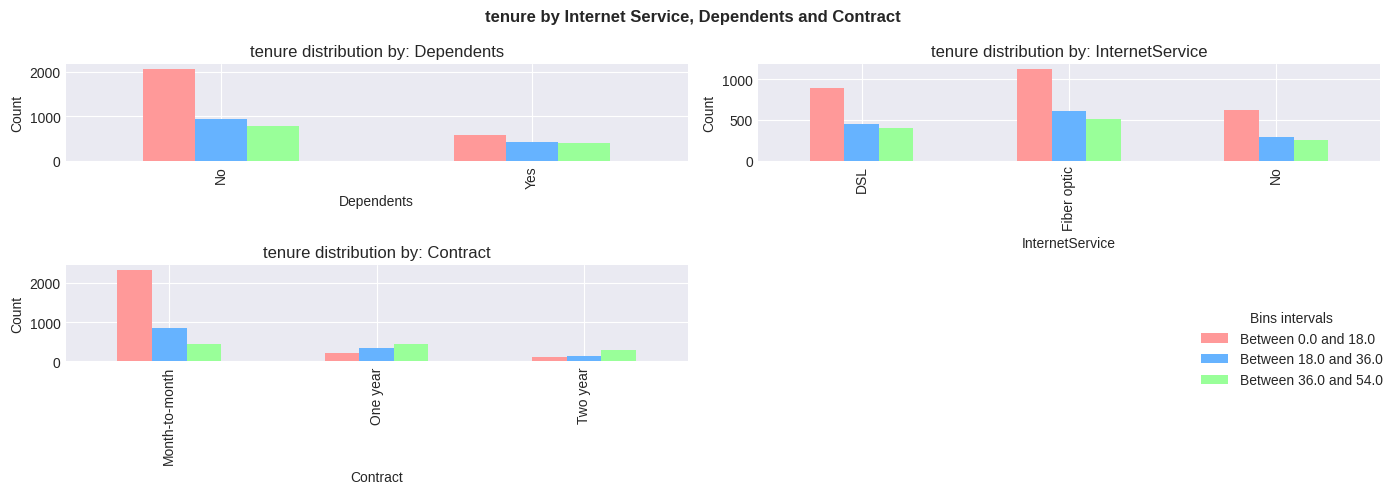

In [ ]:
view_feature_by_columns("tenure")

# Conclusion

*   **Internet Service is the #1 Price Driver:**
    *   Fiber Optic = Highest Bills
    *   DSL = Medium Bills
    *   No Internet = Lowest Bills

*   **Contract Length Signals Customer Type:**
    *   Month-to-Month = Higher paying, but high-risk (likely to leave).
    *   Two-Year Contracts = Lower paying, but most loyal and stable.

*   **Dependents Have a Minor Impact:**
    *   Customers with no dependents tend to spend slightly more.

### Key Customer Profiles:

*   Clients with Month-to-month contacts who are also more likely paying for premium services like Fibre Optic with Electronic Checks
* Loyal Customers are the ones using long term contracts, automatic payment methodes(Bank or credit card Automatic Transfer and Mailed Check)
$\rightarrow$ It seems like we have to migrate hight-risk (short term and highly paying contracts) to low-risk loyal customers activities.